In [1]:
# Importing of the Library and the Data set of McDonald
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Admin/Documents/Python class/mcdonalds.csv')

In [3]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
df.shape

(1453, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
data = df.iloc[:, :11].values
data = (data == "Yes").astype(int)
col = np.round(np.mean(data, axis=0), 2)
result = pd.Series(col, index=df.columns[:11])
result

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca=pca.fit_transform(data)
MD_p=pca.fit(data)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_

summary_df = pd.DataFrame({
    "Standard Deviation": std_devs,
    "Proportion of Variance": variance_proportions,
    "Cumulative Proportion": variance_proportions.cumsum()
}, index=[f"PC{i+1}" for i in range(len(std_devs))])

# Display the PCA summary
print("PCA Summary:")
print(summary_df)

PCA Summary:
      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [32]:
print("Standard Deviation:\n",SD.round(1))

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [42]:
load = pca.components_
index = df.columns  
rot_df = pd.DataFrame(load.T, index=index[:load.shape[1]], columns=[f"PC{i+1}" for i in range(load.shape[0])])
rot_df = round(-rot_df, 3)
print("Rotation Matrix:\n", rot_df)

Rotation Matrix:
               PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113  0.018   
spicy       0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003   
fast        0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166   
cheap       0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089 -0.370  0.729  0.211  0.027  0.167  0.072   

             PC10   PC11  
yummy       0.110 -0.045  
con

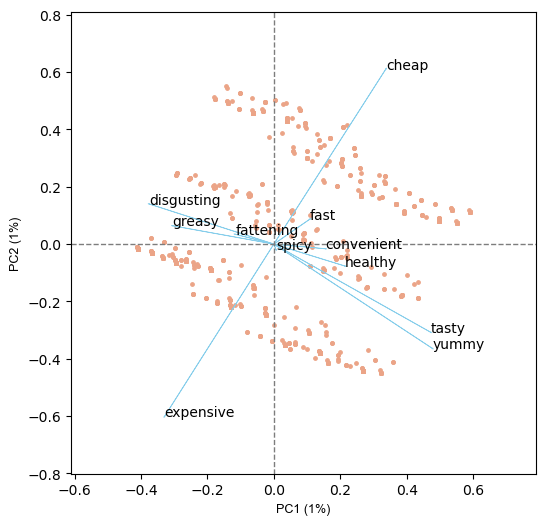

In [78]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=MD_pca, loadings=-load, labels=df.columns.values, var1=1, var2=1, show=True, dim=(6, 6))

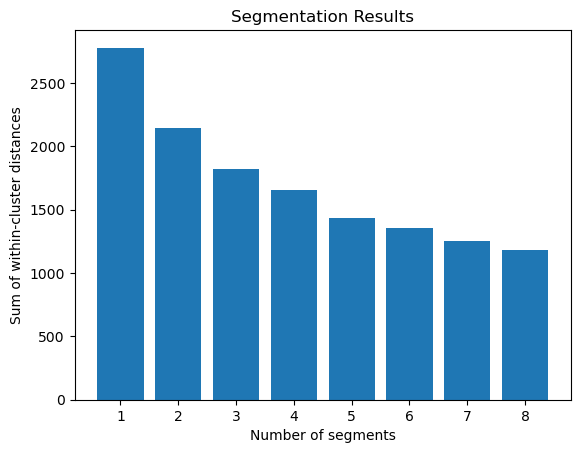

In [88]:
from sklearn.cluster import KMeans
np.random.seed(123)
nrep = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=123)
    kmeans.fit(data)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.xticks(num_segments)
plt.show()


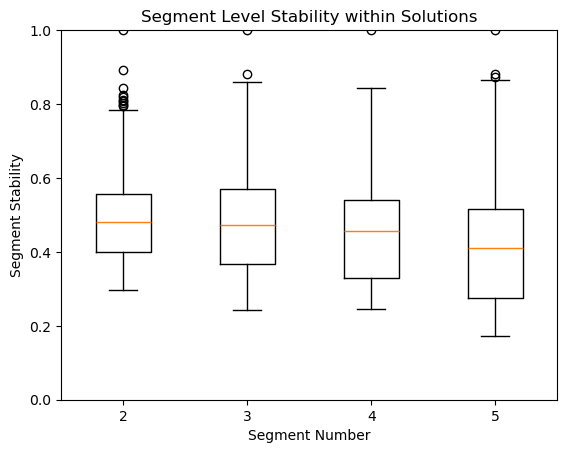

In [90]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(data)
    segment_similarities[segment] = MD_km28[segment].transform(data).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)  # Normalize similarities
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


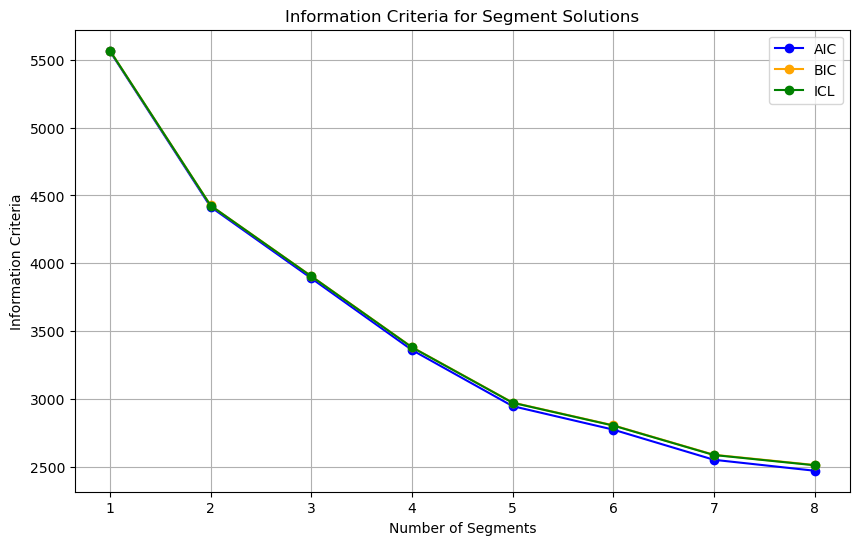

In [100]:
from scipy.stats import entropy
MD_model_info = []

for k in num_segments:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(data)
    
    log_likelihood = -model.inertia_
    n_samples = data.shape[0]
    
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    counts = np.bincount(model.labels_)
    probs = counts / counts.sum()
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_model_info.append((k, aic, bic, icl))

# Convert to DataFrame
MD_model_info = pd.DataFrame(MD_model_info, columns=["k", "AIC", "BIC", "ICL"])

# Plotting
plt.figure(figsize=(10, 6))
for criterion, color in zip(["AIC", "BIC", "ICL"], ['blue', 'orange', 'green']):
    plt.plot(MD_model_info["k"], MD_model_info[criterion], marker='o', color=color, label=criterion)

plt.xlabel('Number of Segments')
plt.ylabel('Information Criteria')
plt.title('Information Criteria for Segment Solutions')
plt.legend()
plt.grid(True)
plt.show()


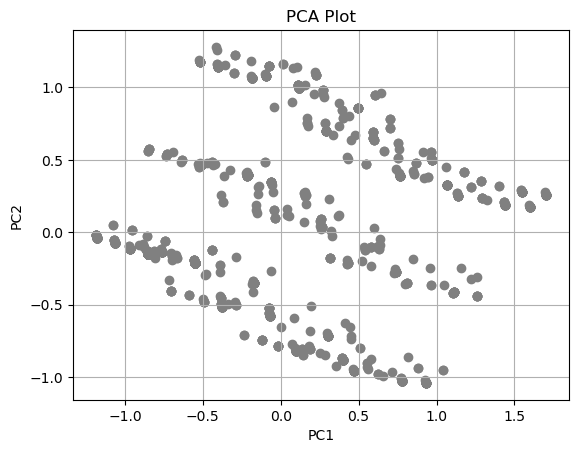

In [102]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.grid()
plt.show()